<a href="https://colab.research.google.com/github/LeyloJohnny/Computational-Neuroscience/blob/main/Rasterplots_from_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#get data from google drive
!gdown --id 1LvD4yrrrNhc98udFEl59Aa3Z7w_xoZ6S
#unzip data
!unzip 'Leyla_Data.zip'

Downloading...
From: https://drive.google.com/uc?id=1LvD4yrrrNhc98udFEl59Aa3Z7w_xoZ6S
To: /content/Leyla_Data.zip
2.12MB [00:00, 67.5MB/s]
Archive:  Leyla_Data.zip
  inflating: default.py              
  inflating: GIF.pkl                 
  inflating: IAF.pkl                 
  inflating: simulate_EI_network_Minimum.py  
  inflating: BN.pkl                  


In [2]:
#show all data files
!ls
# BN : Balanced Network
# IAF: clustered wo SFA (Spikre-frequency adaptation)
# GIF: clusterd with SFA

BN.pkl	    GIF.pkl  Leyla_Data.zip  simulate_EI_network_Minimum.py
default.py  IAF.pkl  sample_data


In [ ]:
#what do the network parameters mean?
#!cat simulate_EI_network_Minimum.py  
#remove # before !cat to print simulation code


In [69]:
#import pickle
import pickle

#create list of model name strings
models = ['BN.pkl', 'GIF.pkl', 'IAF.pkl']

#read pickle file


#create lists to store model data
models_x = []
models_y = []

#for all models
for i in range(len(models)):

  #open pickle file
  with open(models[i], 'rb') as f:
    #get x (actual data: time * neuron id)
    x = pickle.load(f)
    #get y (information on data, such as inhibitory/excitatory neurons, clusters, etc.)
    y = pickle.load(f)
    #add x and y to the models lists
    models_x.append(x)
    models_y.append(y)

In [78]:
#show y
models_y[0]

{'I_th_E': 2.13,
 'I_th_I': 1.24,
 'N_E': 4000,
 'N_I': 1000,
 'Q': 1,
 'delta_I_xE': 0.0,
 'delta_I_xI': 0.0,
 'dt': 0.001,
 'jplus': array([[1., 1.],
        [1., 1.]]),
 'n_jobs': 4,
 'neuron_type': 'iaf_psc_exp',
 'q_stc': [0.0008333333333333333],
 'record_from': 1,
 'record_voltage': False,
 'simtime': 5000,
 'tau_stc': [180.0],
 'warmup': 250}

In [80]:
#show x
#first model, both dimensions, 5 data points (time, neuron id)
models_x[0][:, :5]

array([[1.800e-02, 4.400e-02, 2.440e-01, 3.910e-01, 3.950e-01],
       [3.630e+02, 2.075e+03, 2.215e+03, 1.523e+03, 2.559e+03]])

In [84]:
#how many neurons do we have?
#first model, second dimension (neuron id), get maximum from all values (neuron ids)
import numpy as np
np.max(models_x[0][1, :])
#5000 neurons (4000 ex., 1000 inh.)

4999.0

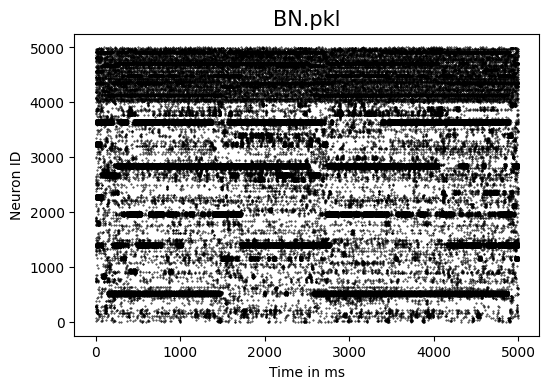

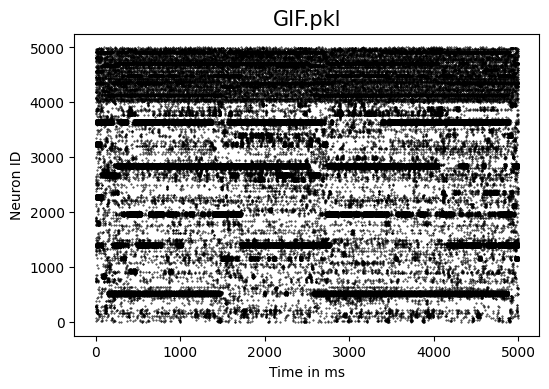

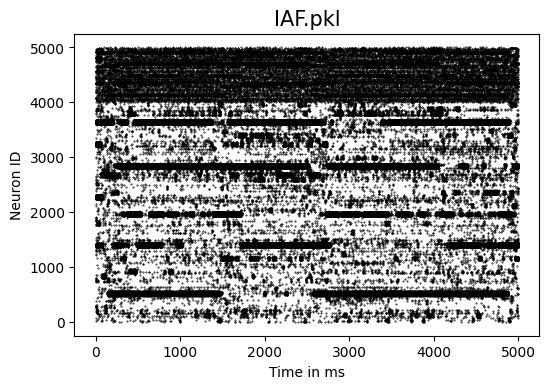

In [86]:
import matplotlib.pyplot as plt

rasterplots = []

for i in range(len(models)):

  #create figure
  figure = plt.figure(dpi=100)
  #create subplot
  ax = figure.add_subplot(1,1,1)
  #plot both dimensions of x (time, neuron id)
  plt.plot(x[0],x[1],'.k',markersize = 0.8) 

  ax.set_xlabel('Time in ms', fontsize = 10)
  ax.set_ylabel('Neuron ID', fontsize = 10)
  ax.set_title(models[i], fontsize = 15)

  #set limits (up to 0.5sec)
  #plt.xlim(0, 500)

  rasterplots.append(figure)
